<a href="https://colab.research.google.com/github/deny-joefakri/Multiple-Linear-regression/blob/main/Multiple_Linear_Regression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [ ]:
from google.colab import drive  
drive.mount('/content/drive', force_remount=True)  

dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Boston/BostonHousing.csv'

Mounted at /content/drive


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

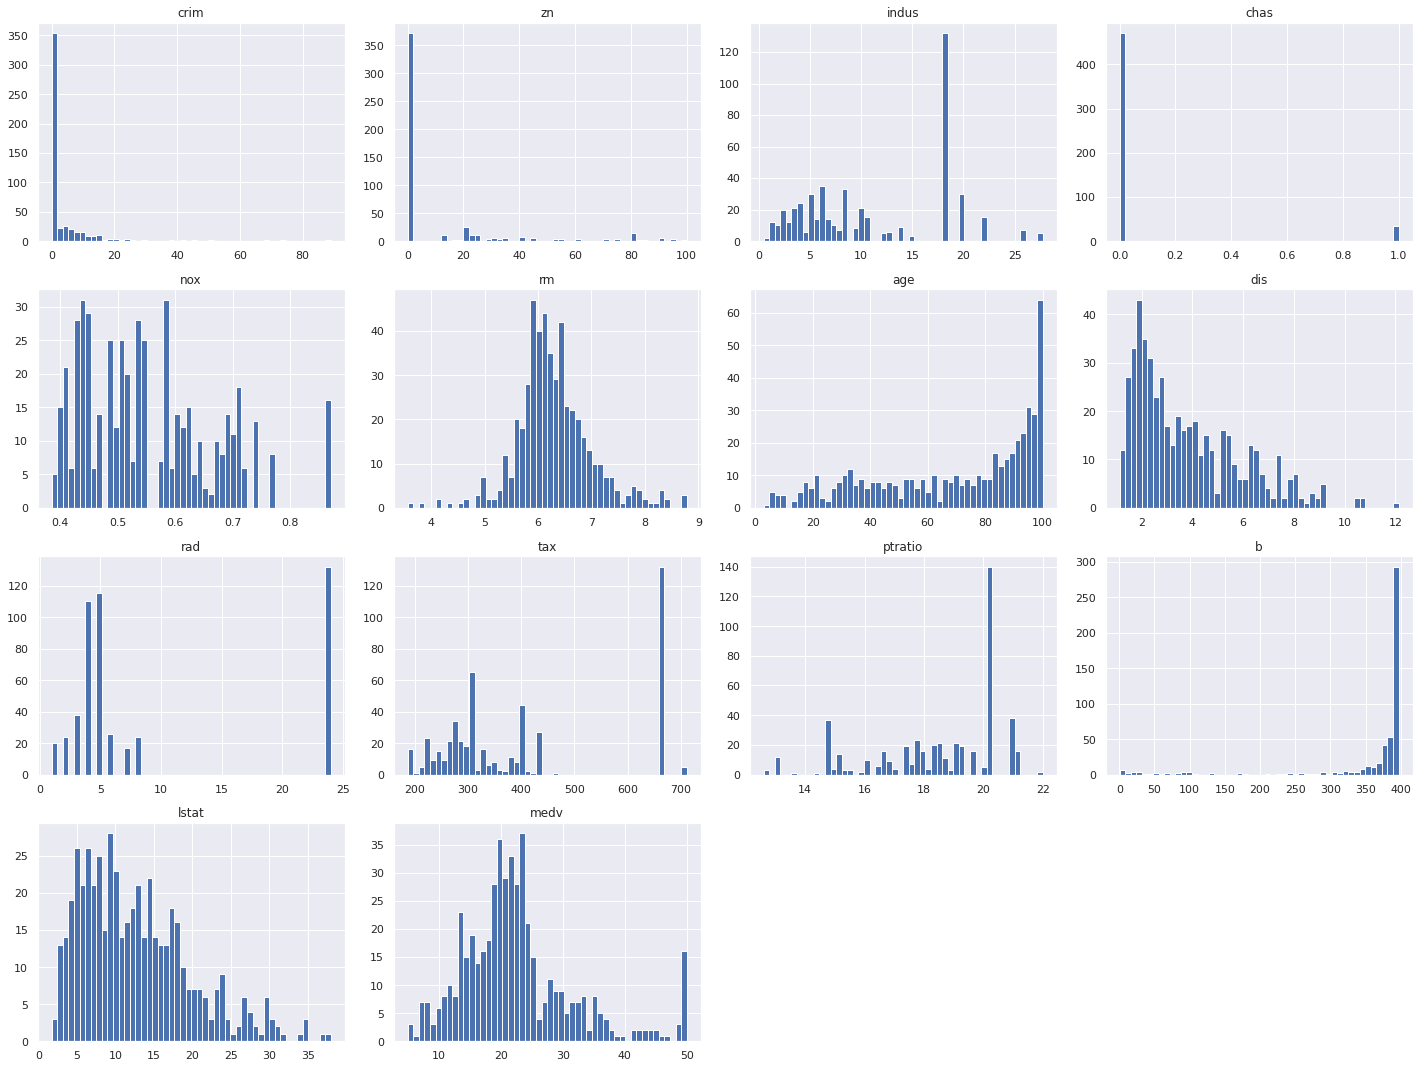

In [ ]:
data_set = pd.read_csv(dataset_dir)
# data_set.head()
X = data_set.drop(columns=['medv'])
y = data_set['medv']

print(data_set.describe())


data_set.hist(figsize=(20,15), bins=50)
plt.tight_layout()
plt.show()


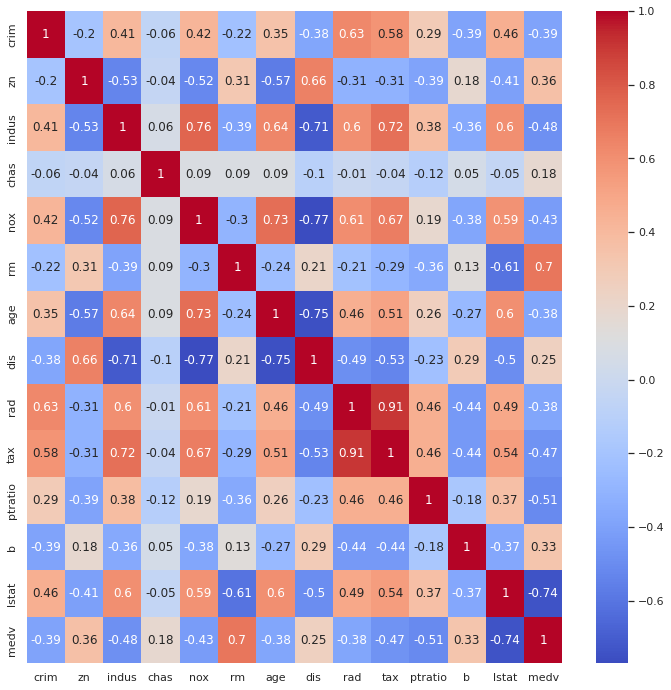

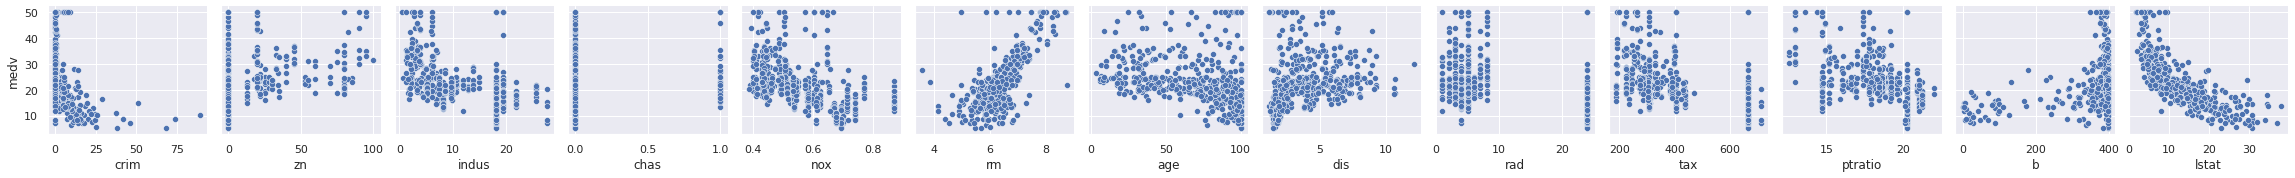

In [ ]:
corr_matrix = data_set.corr().round(2)

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Create a scatter plot matrix
sns.pairplot(data_set, x_vars=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], y_vars=['medv'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(f_regression, k=5)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Build a multiple linear regression model with all features
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

# Build a multiple linear regression model with selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate the performance of the models
mse_all = mean_squared_error(y_test, y_pred_all)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_all = r2_score(y_test, y_pred_all)
r2_selected = r2_score(y_test, y_pred_selected)

# Print the results
print('MSE (all features):', mse_all)
print('MSE (selected features):', mse_selected)
print('R2 (all features):', r2_all)
print('R2 (selected features):', r2_selected)

MSE (all features): 24.291119474973478
MSE (selected features): 27.891158402464427
R2 (all features): 0.6687594935356326
R2 (selected features): 0.619668354740563
